In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv', parse_dates=['DATE'], index_col='DATE')
df.columns=["KOUS"]
df['KOUS'].replace('.', '', inplace=True)
df['KOUS'] = pd.to_numeric(df['KOUS'])
df.fillna(method='ffill', inplace=True)

# 연도별 

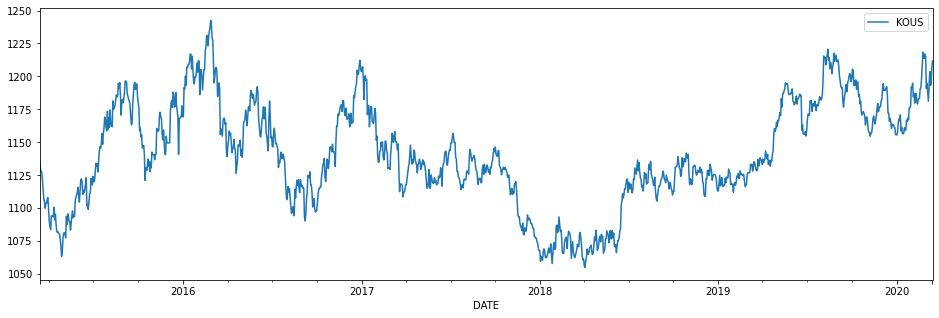

In [ ]:
df.plot(figsize=(16,5))

In [ ]:
df_w=df.resample('W-Fri').last()

In [ ]:
df_2017 = df_w[df_w.index.year==2017]
df_2019 = df_w[df_w.index.year==2019]

In [ ]:
df_2019.tail()

,KOUS
DATE,
2019-11-29,1181.33
2019-12-06,1189.86
2019-12-13,1171.97
2019-12-20,1160.30
2019-12-27,1160.87


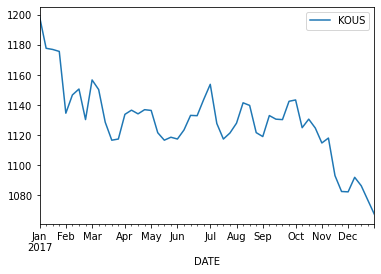

In [ ]:
df_2017.plot()

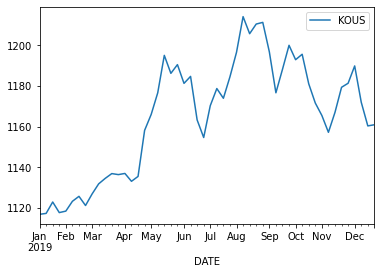

In [ ]:
df_2019.plot()

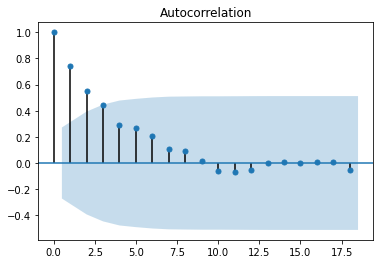

In [ ]:
plot_acf(df_2017)
plt.show()

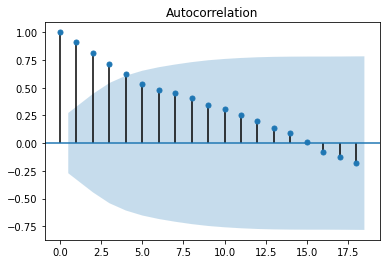

In [ ]:
plot_acf(df_2019)
plt.show()

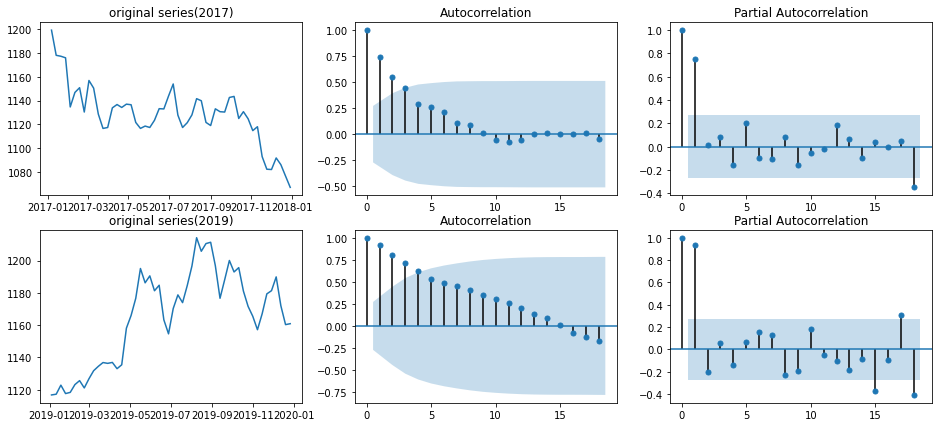

In [ ]:
# 첫번째 행 : 2017년 데이터의 원계열, ACF, PACF
# 두번째 행 : 2019년 데이터의 원계열, ACF, PACF 
figure, axes = plt.subplots(2, 3, figsize=(16, 7))
axes[0,0].plot(df_2017)
axes[0,0].set_title('original series(2017)')
axes[1,0].plot(df_2019)
axes[1,0].set_title('original series(2019)')
plot_acf(df_2017, ax=axes[0,1])
plot_acf(df_2019, ax=axes[1,1])
plot_pacf(df_2017, ax=axes[0,2])
plot_pacf(df_2019, ax=axes[1,2])
plt.show()

- 2017에비해 2019년은 외부 충격이 오래 지속되었다. 3주 -4주
- 2017년에는 외부충격이 다음기에 0.75 남아있지만, 2019년에는 0.9남아있다. (persistency가 증가하고 있다. )
--> 가입자, 사용자 마케팅효과 분석
--> 주가지수, 환율 : 외부 충격이 얼마나 오래 지속되는가. 
